# Chapter 3 exercise

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Question

The logistic function is given by the following expression in which parameters $t_0$, $C$, $r$ are constants determining the location, scale and shape of the curve:

\begin{equation}
x=\frac{C}{1+e^{-r(t-t_0)}}.
\end{equation}

Taking a step size `h=1e-3` and with paramater values $t_0=3$, $C=75$, $r=1.5$, numerically estimate the second derivative of the logistic function: 

(a) using the forward difference formula,<br>
(b) using the central difference formula.

You will need to extend the function estimate at *two* exterior points to obtain a result for the derivative at each point in the interval.

Plot the error in each of your estimates, given that the analytic result satisfies the equation below, and write a short explanation of your findings.
\begin{equation}
\frac{\mathrm{d}^2 x}{\mathrm{d}t^2} = \frac{r^2 x(C-x)(C-2x)}{C^2}.
\end{equation}

```{note}
**Forward** :

\begin{equation*}
y^{\prime\prime}_k = \frac{y_{k}-2y_{k+1}+y_{k+2}}{h^2} +\mathcal{O}(h)
\end{equation*}

**Central** :

\begin{equation*}
y^{\prime\prime}_k = \frac{y_{k-1}-2y_k+y_{k+1}}{h^2} + \mathcal{O}(h^2)
\end{equation*}
```

## Solution

There are countless ways of doing this, including loop-based methods. The following implementation is relatively concise and efficient:

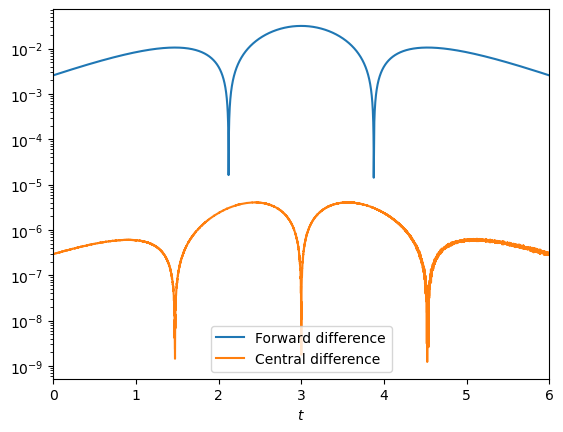

In [2]:
t0=3; C=75; r=1.5; tmin=0; tmax=6; h=1e-3  

t = np.arange(tmin-h,tmax+3*h,h)      #Extend by +2RHS, +1LHS
x = C/(1+np.exp(-r*(t-t0)))           #Logistic function
xdd = (x[0:-2]-2*x[1:-1]+x[2:])/h**2  #2nd derivative formula

t,x=t[1:-2],x[1:-2];                  #Drop extra gridpoints
xpp = r**2*x*(C-x)*(C-2*x)/C**2       #Analytic result

plt.semilogy(t,np.abs(xdd[1:]-xpp) ,label='Forward difference')
plt.semilogy(t,np.abs(xdd[0:-1]-xpp),label='Central difference')

plt.xlabel('$t$'); plt.xlim(tmin,tmax); plt.legend()
plt.show()

Things to look for in solution:

* Correct grid spacing as specified by the step size `h=1e-3` given in the question. The solution domain should be clearly defined.<br></br>

* Correct calculation of the logistic function, with no misplaced brackets!<br></br>

* Accurate implementation of the second derivative formula. Whilst this can be done with a loop-based method, the slicing technique was demonstrated in the notes and such tehniques will form the basis for the extension work on this topic.<br></br>

* The forward and central difference second derivative formulas are identical, but offset by one gridpoint. Solutions that can make use of this demonstrate most sophistication.<br></br>

* The analytic result should be calculated from the given expression involving x. When determining the error it is not essential that the absolute value is taken.<br></br>

* Both error curves should be visible on the solution plot. Here this has been achived using a logarithic scale, but an approach that uses subplots is also acceptable. The plots should be clearly labelled, or at least identifiable.<br></br>

* Ideally, implementations should be concise, clear and efficient. However, the most efficient approach will not necessarily be the clearest! A judgement may need to be made about where to compromise, but answers that are repetitious are generally not the best.<br></br>

* The comment should note that the size of the errors is predicted by the truncation order of the finite difference formulae. In the forward difference formula the error is $\mathcal{O}(h)$ and in the central difference formula it is $\mathcal{O}(h^2)$. The solutions we found are broadly consistent with this prediction.<br>